# 4-4 分类准确度 accuracy

下面使用一个简单的手写数字识别数据集。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from sklearn import datasets

# digit 数字
digits = datasets.load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [4]:
X = digits.data
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
X.shape

(1797, 64)

In [6]:
X.min(), X.max()

(0.0, 16.0)

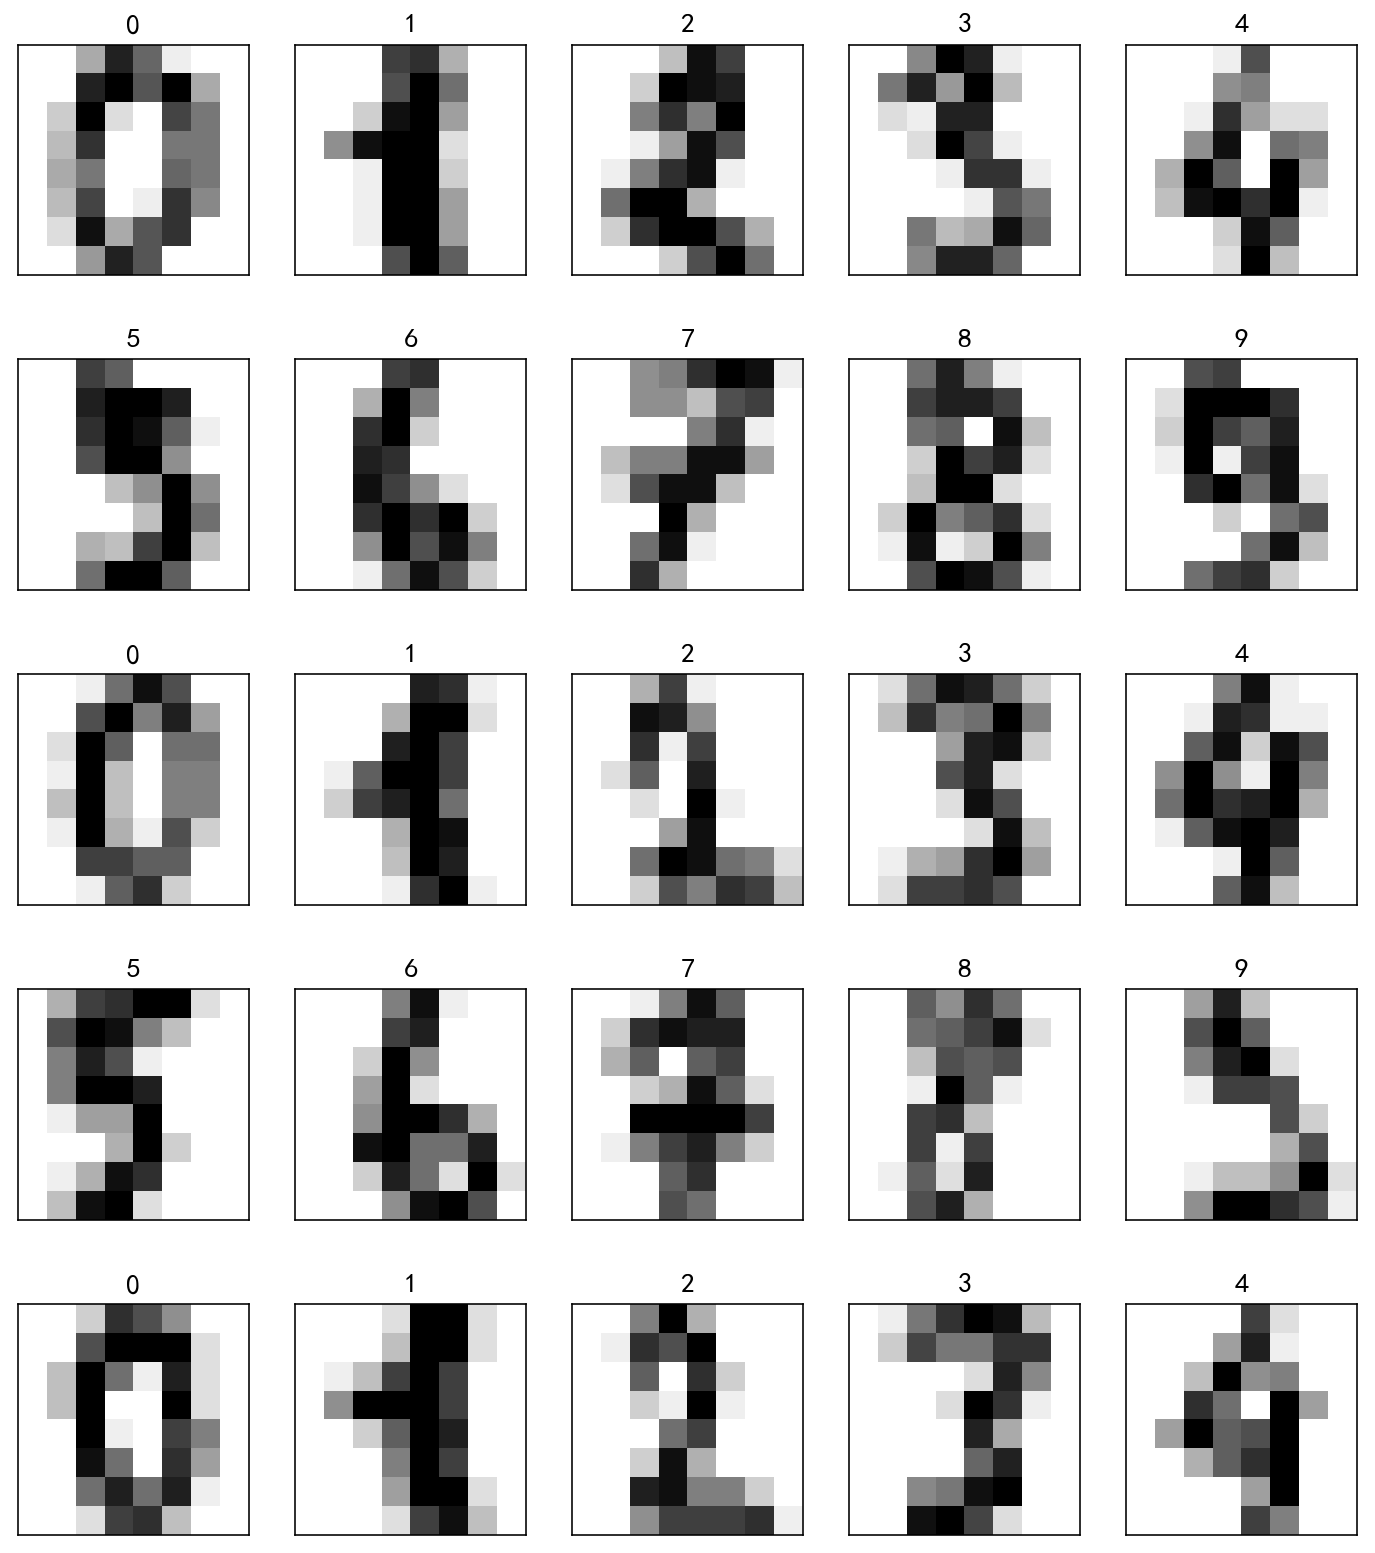

In [7]:
# plt.figure(dpi=100)
fig = plt.gcf()
fig.set_size_inches(12, 14)
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    ax.imshow(X[i].reshape(8, 8), cmap=matplotlib.cm.binary)
    ax.set_title(y[i], fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [8]:
some_digits = X[666]

In [9]:
y[666]

0

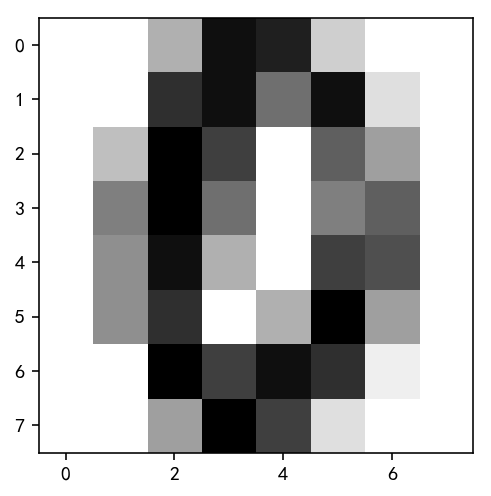

In [10]:
some_digits_image = some_digits.reshape(8,8)
plt.imshow(some_digits_image, cmap = matplotlib.cm.binary)
plt.show()

In [11]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio = 0.2)

In [12]:
from playML.KNNClassifier import KNNClassifier

my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train, y_train)

KNN(k=3)

In [13]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([1, 9, 2, 9, 6, 6, 3, 4, 1, 4, 9, 8, 2, 8, 1, 7, 6, 6, 0, 6, 2, 5,
       5, 0, 2, 7, 3, 7, 2, 5, 2, 7, 2, 9, 6, 6, 3, 1, 7, 6, 4, 9, 9, 3,
       4, 5, 8, 5, 3, 0, 4, 6, 8, 6, 0, 1, 4, 3, 4, 8, 8, 5, 3, 9, 4, 0,
       0, 4, 7, 2, 0, 7, 8, 8, 5, 9, 7, 0, 8, 2, 9, 6, 0, 9, 5, 2, 5, 6,
       4, 6, 4, 8, 7, 9, 0, 7, 9, 7, 3, 8, 8, 0, 2, 5, 5, 7, 4, 3, 6, 6,
       3, 4, 9, 4, 1, 4, 7, 0, 2, 4, 3, 3, 6, 5, 0, 3, 3, 6, 7, 0, 0, 8,
       6, 6, 0, 2, 2, 7, 5, 0, 2, 3, 8, 5, 8, 8, 1, 5, 0, 6, 3, 8, 7, 4,
       7, 6, 3, 6, 9, 9, 5, 0, 9, 9, 3, 7, 0, 8, 7, 8, 7, 7, 4, 6, 6, 0,
       9, 1, 4, 3, 6, 8, 5, 6, 4, 5, 2, 3, 2, 0, 3, 3, 4, 0, 5, 9, 1, 0,
       9, 1, 1, 0, 6, 4, 2, 7, 3, 5, 2, 7, 9, 4, 4, 1, 9, 5, 6, 5, 6, 1,
       7, 4, 2, 2, 9, 3, 6, 2, 5, 6, 8, 8, 0, 7, 9, 5, 5, 8, 7, 4, 8, 4,
       4, 4, 7, 7, 3, 3, 8, 6, 2, 5, 3, 2, 2, 7, 5, 4, 9, 1, 3, 2, 2, 1,
       3, 3, 6, 1, 1, 6, 4, 9, 6, 2, 8, 9, 9, 9, 0, 6, 4, 5, 1, 8, 0, 3,
       8, 5, 2, 2, 7, 0, 8, 8, 8, 0, 4, 8, 6, 2, 9,

In [14]:
sum(y_predict == y_test) / len(y_test)

0.9860724233983287

我们可以将上面的算式定义成一个指标。

写在 metrics.py 文件中。

```python
def accuracy_score(y_true, y_predict):
    '''
    计算 y_true 和 y_predict 之间的准确率
    :param y_true:
    :param y_predict:
    :return:
    '''
    assert len(y_true) == len(y_predict), "the size of y_true must be equal to the size of y_predict"
    return sum(y_true == y_predict) / len(y_true)
```

我们把它作为一个方法，放到我们写的 kNN 模型中。

** 把 API 接口设计成这样的原因是，有的时候，其实我们并不关心预测的结果是什么，但是我们很关心准确率。**

In [15]:
from playML.KNNClassifier import KNNClassifier

my_knn_clf.score(X_test, y_test)

0.9860724233983287

## 使用 scikit-learn 中的 accuracy_score

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
y_predict = knn_clf.predict(X_test)
y_predict

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 3, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 5, 7, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 9, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       9, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9888888888888889

直接评分（关心分类的准确度）而不去关心分类的结果。

In [21]:
knn_clf.score(X_test, y_test)

0.9888888888888889

---

下面是练习。

In [22]:
from sklearn import datasets

digits = datasets.load_digits()

In [23]:
X = digits.data
y = digits.target

In [24]:
X.min(), X.max()

(0.0, 16.0)

In [25]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [26]:
X.shape, y.shape

((1797, 64), (1797,))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.9861111111111112


In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9861111111111112